In [20]:
#Input NPM
NPM = ""

#Input NPM teman yang berkolaborasi dengan Anda dalam mengerjakan tugas ini
KOLABORATOR = []

#Input link referensi atau sumber lain yang Anda gunakan dalam menyelesaikan tugas ini
REFERENSI = []

## PR 2 Linear and Logistic Regression

#### Tugas ini terdiri dari 2 bagian:

* Implementasi (Score: 50)
    * [Soal 1 - Implementasi Linear Regression](#Soal-1)
    * [Soal 2 - Analisis Linear Regression](#Soal-2)
    * [Soal 3 - Implementasi Logistic Regression](#Soal-3)
    * [Soal 4 - Analisis Logistic Regression](#Soal-4)
* Demo program (Score: 50) (jadwal demo akan diumumkan via scele)
* Dataset yang digunakan untuk Linear Regression adalah insurance.csv dan untuk Logistic Regression adalah data yang sama dengan PR 1 yaitu pasien_liver.csv

* Berikut ketentuan pengerjaan PR 2:

   - Silahkan untuk menjawab di bagian <b># YOUR CODE HERE</b>

   - Jangan mengubah class dan method yang sudah ada, tetapi Anda dipersilahkan untuk menambah parameter, variabel, atau method baru jika diperlukan

   - Library yang boleh digunakan hanya Numpy, Pandas, dan Matplotlib 

   - Berikan penjelasan singkat mengenai code yang Anda buat

In [22]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

AttributeError: type object 'pandas._libs.tslibs.conversion._TSObject' has no attribute '__reduce_cython__'

In [23]:
def is_similar(X, Y):
    if isinstance(X, list) and isinstance(Y, list):
        if len(X) == len(Y):
            return all([is_similar(x,Y[i]) for i,x in enumerate(X)])
        else:
            return False
    return abs(X-Y) <= 1e-7

## Soal 1 
### Linear Regression (20 poin)

* Pada soal ini Anda diminta untuk mengimplementasikan Linear Regression untuk mencari hubungan antara atribut-atribut yang ada pada data dalam mempengaruhi harga self insurance seseorang
* Data yang digunakan memiliki 5 fitur, yaitu age, sex, bmi, children, smoke. Charges adalah variabel target yang akan diprediksi

In [19]:
data_linreg = pd.read_csv("insurance.csv") #load the dataset
data_linreg.head(10)

NameError: name 'pd' is not defined

Silahkan melakukan preprocessing data. Beberapa preprocessing yang bisa dilakukan antara lain melakukan encode pada data kategori, menangani missing value, normalisasi data value, dan sebagainya

In [118]:
# PREPROCESSING DATA
data_linreg = data_linreg.dropna()

data_linreg['smoker'][data_linreg['smoker'] == 'no'] = 0
data_linreg['smoker'][data_linreg['smoker'] == 'yes'] = 1

data_linreg['sex'][data_linreg['sex'] == 'female'] = 0
data_linreg['sex'][data_linreg['sex'] == 'male'] = 1

data_linreg=(data_linreg - data_linreg.mean()) / data_linreg.std()

data_linreg.head(10)

c:\users\ardanto finkan septa\documents\kuliah\ml\env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\ardanto finkan septa\documents\kuliah\ml\env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,sex,bmi,children,smoker,charges
0,-1.440949,-1.01244,-0.451213,-0.908337,1.96707,0.296815
1,-1.512185,0.986976,0.511308,-0.079472,-0.50799,-0.954391
2,-0.799822,0.986976,0.385049,1.578258,-0.50799,-0.729568
3,-0.443640,0.986976,-1.303052,-0.908337,-0.50799,0.717715
4,-0.514876,0.986976,-0.290519,-0.908337,-0.50799,-0.777655
5,-0.586113,-1.01244,-0.805394,-0.908337,-0.50799,-0.786753
6,0.482433,-1.01244,0.457197,-0.079472,-0.50799,-0.416661
7,-0.158694,-1.01244,-0.477448,1.578258,-0.50799,-0.495821
8,-0.158694,0.986976,-0.134745,0.749393,-0.50799,-0.568048
9,1.479742,-1.01244,-0.788997,-0.908337,-0.50799,1.290410


In [119]:
# Pembagian fitur dan label
features = data_linreg.drop(["charges"], axis=1).values
label = data_linreg['charges'].values

Tanpa menggunakan library external, implementasikan fungsi hipotesis h(x)

$$ h(x) = w^Tx $$

dengan w adalah bobot dan x direpresentasikan sebagai list dengan panjang yang sama dengan w

In [62]:
def h(x):
    global w
    # YOUR CODE HERE
    a = np.dot(np.asarray(w), x)
    return a

In [63]:
# code ini digunakan untuk memeriksa apakah fungsi h yang Anda implementasikan sudah sesuai
w, x = [1,2,3], [2,3,4]
assert is_similar(h(x),20)

w, x = [-1,-1,-1], [2,3,4]
assert is_similar(h(x),-9)

tanpa menggunakan library eksternal, gunakan h yang sudah diemplementasikan di atas untuk mengimplementasikan cost funtion $J(w)$ untuk Linear Regression

$$J(w) = \frac{1}{2}\sum_{i=1}^m (h_w(x^{(i)}) - y^{(i)})^2 $$

In [106]:
def cost_func_linreg(X, y):
    m = len(y)
    
    global w
    # YOUR CODE HERE
    sum = 0
    for i in range(m):
        sum += (h(X[i]) - y[i])**2 / 2
    return sum

In [74]:
# code ini digunakan untuk memeriksa apakah cost function yang Anda implementasikan sudah sesuai
w, X, y = [-1, 0], [[1,1],[0,1]], [-1,0]
assert is_similar(cost_func_linreg(X,y),0)

w, X, y = [1, 1, 2], [[1,1,1],[0,0,0]], [0,0]
assert is_similar(cost_func_linreg(X,y),8)

tanpa menggunakan library eksternal, gunakan cost function di atas untuk mengimplementasikan satu iterasi dari stochastic gradient descent

In [145]:
# lr adalah learning rate
'''
def SGD(X, y, lr=1e-4):
    global w
    alpha, m = lr, len(y)
    
        
    for j in range(len(w)):
        add = 0
        for i in range(m):
            # YOUR CODE HERE
            add += (y[i] - h(X[i])) * X[i][j]
        w[j] = w[j] + alpha * add
            
    return w
'''
def SGD(X, y, lr=1e-4):
    global w
    alpha, m = lr, len(y)
    
    for i in range(m):  
        for j in range(len(w)):
            w[j] = w[j] + alpha * (y[i] - h(X[i])) * X[i][j]

    return w

implementasikan fungsi is_convergen untuk menentukan termination condition (slide kuliah halaman 18). Anda bisa menambahkan parameter yang sesuai dengan termination condition yang dipilih. Fungsi ini akan mengembalikan nilai boolean termination_condition

In [163]:
def is_convergen(num_of_iter, history):
    # termination_condition = False
    if len(history) <= 1:
        return False
    # YOUR CODE HERE
    diff = abs(history[num_of_iter - 1] - history[num_of_iter - 2])
    if diff < 10**(-4):
        return True
    else:
        return False
    # return termination_condition

cost func before 32899.525331939425
weight before [1, 2, 3, 4, 5]
current loss 32899.525331939425
current loss 2067.1329766844233
current loss 283.8128257026485
current loss 175.024738123781
current loss 167.76620125074095
current loss 167.18884329851429
current loss 167.1249474222428
current loss 167.11421583976045
current loss 167.1117921269924
current loss 167.11116538426242
current loss 167.11099430884175
current loss 167.1109464272344
cost func after 12 iteration 167.11093281522867
weight after 12 iteration [0.29569550507830783, -0.005018188993515945, 0.16220292003888312, 0.05381504356668836, 0.7940722283520794]
[32899.525331939425, 2067.1329766844233, 283.8128257026485, 175.024738123781, 167.76620125074095, 167.18884329851429, 167.1249474222428, 167.11421583976045, 167.1117921269924, 167.11116538426242, 167.11099430884175, 167.1109464272344]

cost/loss func plot


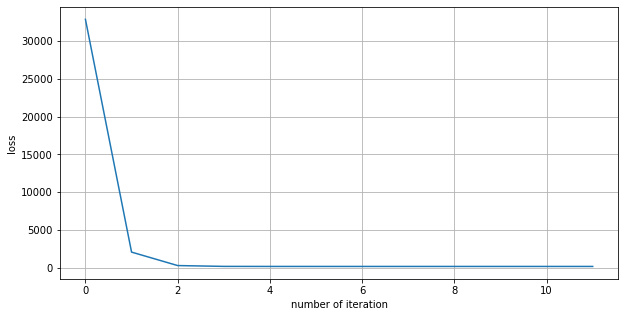

In [164]:
# PLAYGROUND
# you can do anything here as long as not adding any new import
global w

w, features, label = [1, 2, 3, 4, 5], features, label

history = []
print('cost func before', cost_func_linreg(features, label))
print('weight before', w)

number_of_iteration = 0



# bagian ini dapat anda modifikasi sesuai dengan fungsi is_convergen yang telah dibuat diatas
while not is_convergen(number_of_iteration, history):
    history.append(cost_func_linreg(features, label)) 
    w = SGD(features, label, lr=0.001)
    print("current loss " + str(history[number_of_iteration]))
    number_of_iteration += 1
    
print('cost func after ' + str(number_of_iteration) + ' iteration ' + str(cost_func_linreg(features, label)))
print('weight after ' + str(number_of_iteration) + ' iteration ' + str(w))

print(history)

print('\ncost/loss func plot')
plt.figure(figsize=(10,5))
plt.plot(history)
plt.xlabel('number of iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()


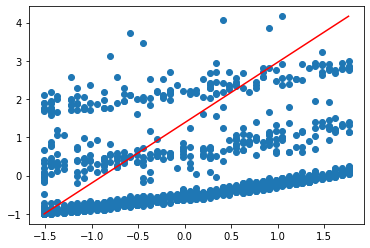

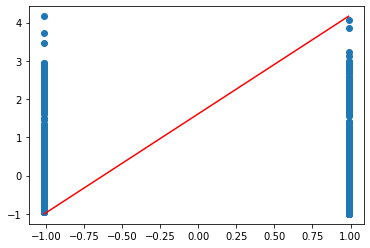

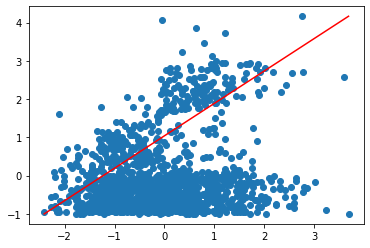

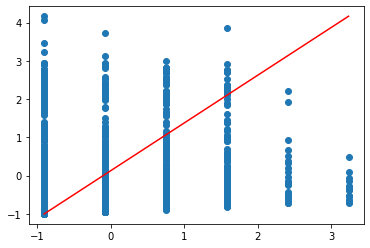

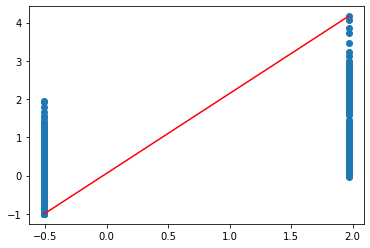

In [165]:
# visualisasikan variabel charges dan 1 fitur yang menurut Anda berpengaruh paling besar pada charges kedalam 2D plot

def linreg_plot(feature, label):
    plt.scatter(feature, label)
    plt.plot([min(feature), max(feature)], [min(label), max(label)], color='red') # predicted
    plt.show()

dt_features = pd.DataFrame(np.array(features), columns=data_linreg.columns[:-1])

# Ambil fitur yang Anda pilih dari dt_features dengan mengganti "FITUR X"
feature = dt_features['age'].to_numpy()
linreg_plot(feature, label)

feature = dt_features['sex'].to_numpy()
linreg_plot(feature, label)

feature = dt_features['bmi'].to_numpy()
linreg_plot(feature, label)

feature = dt_features['children'].to_numpy()
linreg_plot(feature, label)

feature = dt_features['smoker'].to_numpy()
linreg_plot(feature, label)

## Soal 2 
### Analisis Linear Regression (5 poin)
* Jelaskan secara singkat analisis Anda terhadap hasil Linear Regression yang didapatkan

## JAWABAN

## Soal 3  
### Logistic Regression (20 poin)
* Pada soal ini Anda diminta untuk mengimplementasikan Logistic Regression untuk klasifikasi pasien liver atau non liver, jika diketahui atribut-atribut yang ada pada pasien_liver.csv

In [ ]:
data_logreg = pd.read_csv("pasien_liver.csv", header=None)
data_logreg.head(10)

Silahkan melakukan preprocessing data jika diperlukan. Anda bisa menggunakan preprocessing yang telah Anda lakukan pada PR 1

In [ ]:
# PREPROCESSING DATA

In [ ]:
# Pembagian fitur dan label
classification_data = data_logreg.drop([10], axis=1).values
classification_label = data_logreg[10].values

In [ ]:
# Rererensi perbedaan predict dan predict_proba https://discuss.analyticsvidhya.com/t/what-is-the-difference-between-predict-and-predict-proba/67376/4
# Anda dapat berkreasi pada method yang Anda buat. Hint hanya untuk membantu Anda dalam pengerjaan (tidak harus sama dengan hint yang diberikan)

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000):
        self.lr = lr
        self.num_iter = num_iter
        
    def h(self, w, x):
        return 1 / (1 + e**(-np.dot(w, x)))
    
    def SGA(self, X, y, w, lr):
        alpha, m = lr, len(y)

        for i in range(m):  
            for j in range(len(w)):
                w[j] = w[j] + alpha * (y[i] - self.h(X[i])) * X[i][j]

        return w
    
    def is_convergen(self, num_of_iter, history):
        # termination_condition = False
        if len(history) <= 1:
            return False
        # YOUR CODE HERE
        diff = abs(history[num_of_iter - 1] - history[num_of_iter - 2])
        if diff < 10**(-4):
            return True
        else:
            return False
        # return termination_condition
        
    
    def fit(self, X, y):
        '''Build a logistic regression classifier from the training set (X, y)'''
        # YOUR CODE HERE
        self.w = np.random.randint(10, size=len(X[0]))
        
        history = []
        
        number_of_iteration = 0

        while not is_convergen(number_of_iteration, history):
            history.append(cost_func_linreg(features, label)) 
            w = SGD(features, label, lr=0.001)
            print("current loss " + str(history[number_of_iteration]))
            number_of_iteration += 1
            # raise NotImplementedError()

    def predict_proba(self, X):
        '''Predict class probabilities of the input samples X'''
        '''hint: you can put or call your sigmoid function here to predict probablity of input sample X'''
        # YOUR CODE HERE
        raise NotImplementedError()

    def predict(self, X, threshold=0.5): # default threshold adalah 0.5
        '''Predict class value for X'''
        '''hint: you can use predict_proba function to classify based on given threshold'''
        # YOUR CODE HERE
        raise NotImplementedError()

In [ ]:
model = LogisticRegression(lr=0.1, num_iter=300000)
%time model.fit(classification_data, classification_label)

### Implementasi Logistic Regression Model dalam training dan testing data
* Silahkan melakukan pembagian data untuk training dan testing (default 60:40)

In [ ]:
from random import seed
from random import randrange
from numpy import empty

# Split a dataset into a train and test set
def train_test_split(data, label, split=0.60):
    train_data = []
    train_label = []
    train_size = split * len(data)
    data_copy = data.tolist()
    label_copy = label.tolist()
    while len(train_data) < train_size:
        index = randrange(len(data_copy))
        train_data.append(data_copy.pop(index))
        train_label.append(label_copy.pop(index))
    
    train_data = np.array(train_data)
    train_label = np.array(train_label)
    data_copy = np.array(data_copy)
    label_copy = np.array(label_copy)
    return train_data, train_label, data_copy, label_copy  

In [ ]:
# test train/test split
seed(5)
x_train_clf, y_train_clf, x_val_clf, y_val_clf = train_test_split(classification_data, classification_label)

In [ ]:
# PLAYGROUND
# you can do anything here as long as not adding any new import

logreg_model = LogisticRegression(lr=0.1, num_iter=300000)
logreg_model.fit(x_train_clf, y_train_clf)

## Evaluasi

In [ ]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("* Confusion Matrix") 
    print(pd.DataFrame(confusion_matrix(y_test, y_pred), \
            index = ['Actual Pasien Liver', 'Actual Pasien Non-Liver'], \
            columns = ['Pred Pasien Liver', 'Pred Pasien Non-Liver'])) 
      
    print ("\n* Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("\n* Classification Report :\n", 
    classification_report(y_test, y_pred)) 

In [ ]:
logreg_y_predict = (logreg_model.predict(x_val_clf))

In [ ]:
cal_accuracy(y_val_clf, logreg_y_predict)

## Soal 4  
### Analisis Logistic Regression (5 poin)
1. Jelaskan secara singkat analisis Anda terhadap hasil Logistic Regression yang didapatkan
2. Jelaskan secara singkat perbedaan hasil evaluasi dari Decision Tree pada PR 1 dan Logistic Regression yang didapatkan pada soal 3 dan mengapa perbedaan tersebut bisa terjadi

## JAWABAN